# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Parametrage regression logistique

---

## Observations et environnement
---

In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [2]:
import importlib
import pandas as pd
import seaborn as sns

### Chargement des données

In [3]:
recueil_filename = 'data/imports/221025-RecueilBrut.csv'

In [4]:
df_brut = pd.read_csv(recueil_filename)

In [5]:
df_brut = df_brut.drop_duplicates('url')

In [6]:
df_brut

,# site,# article,Site,url,Auteur/trice,Date,Titre,Explication (pour les infox seulement),infox,signé,...,inversion de la preuve,invérifiable,titre décalé,dénigrement,cherry picking,degré infox,observateur,thème (abandonné),type infox (abandonné),Date de collection (abandonné)
0,1.0,1,Anguille sous roche,https://www.anguillesousroche.com/actualite/ou...,NaN,28/09/2022,"Ouverture du gazoduc Baltic Pipe, qui relie la...",NaN,non,non,...,non,non,non,non,NaN,NaN,FB,NaN,NaN,NaN
1,1.0,2,Anguille sous roche,https://www.anguillesousroche.com/technologie/...,NaN,30/09/2022,La CIA aurait investi dans une puissante techn...,ils rêvent et font de l'enfumage sur CRISPR,oui,non,...,non,oui,non,non,NaN,1.0,FB,NaN,NaN,NaN
2,1.0,3,Anguille sous roche,https://www.anguillesousroche.com/actualite/ju...,NaN,04/10/2022,"Jusqu’à présent, seuls 9 des 30 États membres ...",NaN,non,non,...,non,non,non,non,non,NaN,FB,NaN,NaN,NaN
3,2.0,4,bonsens.org,https://bonsens.info/essais-pfizer-sur-le-vacc...,NaN,02/01/2022,Essais Pfizer sur le vaccin anti-covid : le ra...,pseudo rapport par une pseudo scientifique mon...,oui,non,...,non,non,non,NaN,NaN,1.0,FB,vaccin,pseudo science,27 avril 22
4,3.0,5,breizh,https://www.breizh-info.com/2022/02/23/180457/...,NaN,23/02/2022,Tests – vaccins – pass : fabrique de la paniqu...,yapa de pandémie et les vaccins ne marchent pas,oui,non,...,non,oui,oui,NaN,NaN,2.0,FB,vaccins,pseudo démonstration,mars 22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,38.0,496,Wikistrike,https://www.wikistrike.com/2022/08/l-un-des-pl...,NaN,24/08/2022,L’un des plus grands complexes mégalithiques d...,NaN,non,non,...,non,non,non,non,NaN,NaN,CN,NaN,NaN,NaN
496,38.0,497,Wikistrike,https://www.wikistrike.com/2022/09/les-command...,NaN,02/09/2022,Les commandos ukrainiens qui ont attaqué la ce...,les Ukrainiens ont essayé de faire échouer la ...,oui,non,...,oui,oui,non,oui,NaN,1.0,FB,NaN,NaN,NaN
497,38.0,498,Wikistrike,https://www.wikistrike.com/2022/09/coupures-el...,NaN,29/09/2022,Coupures électriques imminentes en France,"l'article de Reuters ne dit pas ça, il dit que...",oui,non,...,non,non,oui,non,NaN,1.0,FB,NaN,NaN,NaN
498,38.0,499,Wikistrike,https://www.wikistrike.com/2022/09/11-septembr...,NaN,29/09/2022,11 septembre 2001 : La théorie du « complot pi...,les gens qui disent que 9/11 était un complot ...,oui,non,...,non,non,non,non,NaN,2.0,FB,NaN,NaN,NaN


### Mise en forme des labels

In [7]:
import patat.imp.labels

In [8]:
df_recueil = df_brut.rename(columns = patat.imp.labels.label_translator)

In [9]:
import urllib
def get_site(url):
    if type(url)==str:
        return urllib.parse.urlsplit(url).netloc

df_recueil.loc[:,'site'] = df_recueil['url'].apply(get_site)

In [10]:
df_recueil.value_counts('site')

site
www.francesoir.fr                     114
www.breizh-info.com                    48
lesmoutonsrebelles.com                 40
www.wikistrike.com                     39
lezarceleurs.blogspot.com              32
lesdeqodeurs.fr                        24
lemediaen442.fr                        20
www.dreuz.info                         16
www.profession-gendarme.com            15
fr.sott.net                            15
www.mondialisation.ca                  14
www.polemia.com                        12
reseauinternational.net                11
www.lelibrepenseur.org                 11
www.nouvelordremondial.cc              10
www.lesalonbeige.fr                     9
www.voltairenet.org                     9
lecourrier-du-soir.com                  6
www.les-crises.fr                       5
lesobservateurs.ch                      5
www.preuvesduparanormal.fr              5
lesakerfrancophone.fr                   5
infodujour.fr                           4
www.cnews.fr                 

In [11]:
import numpy as np

def normalize_label(value):
    if type(value) != str:
        return np.NaN
    elif value == 'oui':
        return 1.0
    elif value =='non' :
        return 0.0
    else:
        return np.NaN

In [12]:
df_recueil=df_recueil.rename(columns=patat.imp.labels.label_translator)

In [13]:
df_recueil.keys()

Index(['# site', '# article', 'Site', 'url', 'Auteur/trice', 'Date', 'Titre',
       'Explication (pour les infox seulement)', 'infox', 'signe',
       'entites_nommees', 'entites_coherentes', 'ouverture_esprit',
       'qualite_ecriture', 'intention', 'faits', 'opinions', 'propos_raportes',
       'sources_citees', 'fausse_nouvelle', 'insinuations', 'exageration',
       'scientifique_sulfureux', 'trop_mots', 'trop_chiffres', 'sophisme',
       'inversion_preuve', 'inverifiable', 'titre_decale', 'denigrement',
       'cherry_picking', 'degre_infox', 'observateur', 'thème (abandonné)',
       'type infox (abandonné)', 'Date de collection (abandonné)', 'site'],
      dtype='object')

In [14]:
for label in patat.imp.labels.short_label_names:
    df_recueil[label]=df_recueil[label].apply(normalize_label)

#df_recueil = df_recueil.convert_dtypes()

for label in patat.imp.labels.short_label_names:
    print(label,df_recueil[label].isna().sum())

infox 1
signe 1
entites_nommees 0
entites_coherentes 0
ouverture_esprit 1
qualite_ecriture 2
faits 0
opinions 0
fausse_nouvelle 1
insinuations 2
exageration 256
scientifique_sulfureux 2
trop_mots 1
trop_chiffres 1
sophisme 1
inversion_preuve 1
inverifiable 1
propos_raportes 1
sources_citees 1
titre_decale 1
denigrement 346
cherry_picking 470


In [15]:
df_recueil

,# site,# article,Site,url,Auteur/trice,Date,Titre,Explication (pour les infox seulement),infox,signe,...,inverifiable,titre_decale,denigrement,cherry_picking,degre_infox,observateur,thème (abandonné),type infox (abandonné),Date de collection (abandonné),site
0,1.0,1,Anguille sous roche,https://www.anguillesousroche.com/actualite/ou...,NaN,28/09/2022,"Ouverture du gazoduc Baltic Pipe, qui relie la...",NaN,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,FB,NaN,NaN,NaN,www.anguillesousroche.com
1,1.0,2,Anguille sous roche,https://www.anguillesousroche.com/technologie/...,NaN,30/09/2022,La CIA aurait investi dans une puissante techn...,ils rêvent et font de l'enfumage sur CRISPR,1.0,0.0,...,1.0,0.0,0.0,NaN,1.0,FB,NaN,NaN,NaN,www.anguillesousroche.com
2,1.0,3,Anguille sous roche,https://www.anguillesousroche.com/actualite/ju...,NaN,04/10/2022,"Jusqu’à présent, seuls 9 des 30 États membres ...",NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,FB,NaN,NaN,NaN,www.anguillesousroche.com
3,2.0,4,bonsens.org,https://bonsens.info/essais-pfizer-sur-le-vacc...,NaN,02/01/2022,Essais Pfizer sur le vaccin anti-covid : le ra...,pseudo rapport par une pseudo scientifique mon...,1.0,0.0,...,0.0,0.0,NaN,NaN,1.0,FB,vaccin,pseudo science,27 avril 22,bonsens.info
4,3.0,5,breizh,https://www.breizh-info.com/2022/02/23/180457/...,NaN,23/02/2022,Tests – vaccins – pass : fabrique de la paniqu...,yapa de pandémie et les vaccins ne marchent pas,1.0,0.0,...,1.0,1.0,NaN,NaN,2.0,FB,vaccins,pseudo démonstration,mars 22,www.breizh-info.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,38.0,496,Wikistrike,https://www.wikistrike.com/2022/08/l-un-des-pl...,NaN,24/08/2022,L’un des plus grands complexes mégalithiques d...,NaN,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,CN,NaN,NaN,NaN,www.wikistrike.com
496,38.0,497,Wikistrike,https://www.wikistrike.com/2022/09/les-command...,NaN,02/09/2022,Les commandos ukrainiens qui ont attaqué la ce...,les Ukrainiens ont essayé de faire échouer la ...,1.0,0.0,...,1.0,0.0,1.0,NaN,1.0,FB,NaN,NaN,NaN,www.wikistrike.com
497,38.0,498,Wikistrike,https://www.wikistrike.com/2022/09/coupures-el...,NaN,29/09/2022,Coupures électriques imminentes en France,"l'article de Reuters ne dit pas ça, il dit que...",1.0,0.0,...,0.0,1.0,0.0,NaN,1.0,FB,NaN,NaN,NaN,www.wikistrike.com
498,38.0,499,Wikistrike,https://www.wikistrike.com/2022/09/11-septembr...,NaN,29/09/2022,11 septembre 2001 : La théorie du « complot pi...,les gens qui disent que 9/11 était un complot ...,1.0,0.0,...,0.0,0.0,0.0,NaN,2.0,FB,NaN,NaN,NaN,www.wikistrike.com


### Chargement articles

In [16]:
from patat.imp.importer import Importer
from patat.imp.parser import Parser

In [17]:
imp = Importer()
parser = Parser()

In [18]:
df_recueil['html']=df_recueil['url'].apply(imp.get_webpage)

In [19]:
df_recueil = df_recueil[df_recueil['html']!='']

In [20]:
df_recueil

,# site,# article,Site,url,Auteur/trice,Date,Titre,Explication (pour les infox seulement),infox,signe,...,titre_decale,denigrement,cherry_picking,degre_infox,observateur,thème (abandonné),type infox (abandonné),Date de collection (abandonné),site,html
0,1.0,1,Anguille sous roche,https://www.anguillesousroche.com/actualite/ou...,NaN,28/09/2022,"Ouverture du gazoduc Baltic Pipe, qui relie la...",NaN,0.0,0.0,...,0.0,0.0,NaN,NaN,FB,NaN,NaN,NaN,www.anguillesousroche.com,"<!DOCTYPE html>\n<html class=""no-js"" lang=""fr-..."
1,1.0,2,Anguille sous roche,https://www.anguillesousroche.com/technologie/...,NaN,30/09/2022,La CIA aurait investi dans une puissante techn...,ils rêvent et font de l'enfumage sur CRISPR,1.0,0.0,...,0.0,0.0,NaN,1.0,FB,NaN,NaN,NaN,www.anguillesousroche.com,"<!DOCTYPE html>\n<html class=""no-js"" lang=""fr-..."
2,1.0,3,Anguille sous roche,https://www.anguillesousroche.com/actualite/ju...,NaN,04/10/2022,"Jusqu’à présent, seuls 9 des 30 États membres ...",NaN,0.0,0.0,...,0.0,0.0,0.0,NaN,FB,NaN,NaN,NaN,www.anguillesousroche.com,"<!DOCTYPE html>\n<html class=""no-js"" lang=""fr-..."
3,2.0,4,bonsens.org,https://bonsens.info/essais-pfizer-sur-le-vacc...,NaN,02/01/2022,Essais Pfizer sur le vaccin anti-covid : le ra...,pseudo rapport par une pseudo scientifique mon...,1.0,0.0,...,0.0,NaN,NaN,1.0,FB,vaccin,pseudo science,27 avril 22,bonsens.info,"<!DOCTYPE html>\n<html lang=""fr-FR"">\n<head>\n..."
4,3.0,5,breizh,https://www.breizh-info.com/2022/02/23/180457/...,NaN,23/02/2022,Tests – vaccins – pass : fabrique de la paniqu...,yapa de pandémie et les vaccins ne marchent pas,1.0,0.0,...,1.0,NaN,NaN,2.0,FB,vaccins,pseudo démonstration,mars 22,www.breizh-info.com,"<!doctype html>\n<html lang=""fr-FR"" prefix=""og..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,38.0,496,Wikistrike,https://www.wikistrike.com/2022/08/l-un-des-pl...,NaN,24/08/2022,L’un des plus grands complexes mégalithiques d...,NaN,0.0,0.0,...,0.0,0.0,NaN,NaN,CN,NaN,NaN,NaN,www.wikistrike.com,"<!doctype html>\n<html lang=""fr"">\n <head> ..."
496,38.0,497,Wikistrike,https://www.wikistrike.com/2022/09/les-command...,NaN,02/09/2022,Les commandos ukrainiens qui ont attaqué la ce...,les Ukrainiens ont essayé de faire échouer la ...,1.0,0.0,...,0.0,1.0,NaN,1.0,FB,NaN,NaN,NaN,www.wikistrike.com,"<!doctype html>\n<html lang=""fr"">\n <head> ..."
497,38.0,498,Wikistrike,https://www.wikistrike.com/2022/09/coupures-el...,NaN,29/09/2022,Coupures électriques imminentes en France,"l'article de Reuters ne dit pas ça, il dit que...",1.0,0.0,...,1.0,0.0,NaN,1.0,FB,NaN,NaN,NaN,www.wikistrike.com,"<!doctype html>\n<html lang=""fr"">\n <head> ..."
498,38.0,499,Wikistrike,https://www.wikistrike.com/2022/09/11-septembr...,NaN,29/09/2022,11 septembre 2001 : La théorie du « complot pi...,les gens qui disent que 9/11 était un complot ...,1.0,0.0,...,0.0,0.0,NaN,2.0,FB,NaN,NaN,NaN,www.wikistrike.com,"<!doctype html>\n<html lang=""fr"">\n <head> ..."


In [21]:
from patat.imp.parser_params import css_classes
def parse_row(row):
    if row['site'] in css_classes:
        print(row['url'])
        return parser.parse_article(row['url'],row['html'],row['site'])

In [22]:
%%time
parsed = df_recueil.apply(parse_row,axis=1)

https://www.breizh-info.com/2022/02/23/180457/tests-vaccins-pass-fabrique-de-la-panique-braquage-des-comptes-publics/
https://www.breizh-info.com/2022/02/20/180182/covid-19-la-pandemie-et-les-vaccins-pour-mieux-justifier-un-coup-detat-mondial/
https://www.breizh-info.com/2022/04/19/185260/covid-19-une-epidemie-quasiment-terminee-avant-lete-au-niveau-mondial/
https://www.breizh-info.com/2022/04/15/184984/piscine-voile-ramadan-scenes-de-la-vie-ordinaire-dans-un-prestigieux-lycee-breton/
https://www.breizh-info.com/2021/11/02/173738/faut-il-vous-metisser-comme-le-suggere-la-presse-mainstream/
https://www.breizh-info.com/2021/12/20/176485/qi-races-differences-intelligence-delinquance-wokisme-tour-dhorizon-du-negationnisme-biologique/
https://www.breizh-info.com/2022/05/15/186521/geopolitique-une-analyse-pro-russe-de-la-strategie-militaire-en-ukraine/
https://www.breizh-info.com/2022/05/18/186607/publicite-le-grand-effacement-des-blancs/
https://www.breizh-info.com/2020/05/16/143858/rennes-

https://www.francesoir.fr/societe-sante/milliers-de-navigants-et-scientifiques-se-regroupent-au-niveau-mondial
https://www.francesoir.fr/culture-cinema/un-autre-monde-vincent-lindon-captivant
https://www.francesoir.fr/societe-sante/omicron-le-concurrent-redoute-par-bill-gates
https://www.francesoir.fr/societe-environnement/eoliennes-surveillance-chauve-souris
https://www.francesoir.fr/societe-economie/smartphones-reconditionnes-attention-aux-fraudes
https://www.francesoir.fr/afp-afp/france-leurope-des-solutions-pour-devenir-independante-du-gaz-russe-affirme-bruno-le-maire
https://www.francesoir.fr/opinions-tribunes/xavier-gorce-quand-na-que-la-haine
https://www.francesoir.fr/afp-afp/france-yvan-colonna-les-deputes-prevoient-dauditionner-des-cadres-de-la-penitentiaire
https://www.francesoir.fr/afp-afp/france-le-gouvernement-ance-un-vaste-plan-de-controle-des-7500-ehpad-en-deux-ans
https://www.francesoir.fr/opinions-editos/24-heures-dans-la-peau-dune-femme
https://www.francesoir.fr/polit

https://infodujour.fr/business/des-entreprises/57882-hausse-des-prix-des-materiaux-qui-en-paye-la-note
https://infodujour.fr/societe/55967-covid-19-la-vaccination-nest-pas-sans-risques
https://infodujour.fr/sante/58524-covid-19-les-effets-secondaires-camoufles
https://lalettrepatriote.com/tous-les-vitraux-de-nos-eglises-et-cathedrales-menaces-par-lunion-europeenne/
https://lalettrepatriote.com/la-france-insoumise-me-parait-plus-toxique-aujourdhui-que-le-rassemblement-national/
https://lalettrepatriote.com/augmentation-suspectes-des-prix-lukraine-a-bon-dos-dit-michel-edouard-leclerc/
https://www.lelibrepenseur.org/sanna-marine-la-premiere-ministre-finlandaise-chiale-telle-une-collegienne/
https://www.lelibrepenseur.org/demonstration-factuelle-que-les-injections-darn-messager-sont-une-arnaque-qui-na-rien-de-scientifique/
https://www.lelibrepenseur.org/bill-gates-continue-de-manipuler-loms-avec-ses-milliards/
https://www.lelibrepenseur.org/les-deces-excessifs-sont-en-augmentation-mais-att

https://lezarceleurs.blogspot.com/2021/12/morts-par-vaccin-pfizer-la-fda-le.html
https://lezarceleurs.blogspot.com/2021/09/le-reseau-covid-montre-les-relations.html
https://lezarceleurs.blogspot.com/2022/04/la-pologne-profiterait-de-la-guerre.html
https://lezarceleurs.blogspot.com/2022/04/ue-lhecatombe-post-vaccinale-au-23.html
https://lezarceleurs.blogspot.com/2022/05/la-fraude-massive-de-pfizer-lors-des.html
https://lezarceleurs.blogspot.com/2022/05/azovstal-les-otages-du-bataillon.html
https://lezarceleurs.blogspot.com/2022/05/laffaire-jean-michel-macron-trogneux-un.html
https://lezarceleurs.blogspot.com/2022/05/la-fortune-amassee-par-volodymyr.html
https://lezarceleurs.blogspot.com/2022/05/controler-la-planete-travers-loms-le.html
https://lezarceleurs.blogspot.com/2022/05/un-demi-million-dallemands-ont-subi-de.html
https://lezarceleurs.blogspot.com/2022/05/une-organisation-israelienne-accuse-le.html
https://lezarceleurs.blogspot.com/2022/05/la-veritable-raison-de-la-volonte-de.html

https://lesmoutonsrebelles.com/no-comment-zelensky-appelle-lotan-a-porter-des-frappes-preventives-contre-la-russie/
https://www.nouvelordremondial.cc/2022/07/05/les-etats-unis-financent-un-logiciel-permettant-aux-russes-dacceder-a-des-sites-web-interdits/
https://www.nouvelordremondial.cc/2022/07/12/et-maintenant-une-epidemie-du-virus-de-marburg-a-commence/
https://www.nouvelordremondial.cc/2022/07/12/une-entree-sombre-de-70-metres-decouverte-dans-un-cratere-lunaire-sur-google-moon-29-juin-2022/
https://www.nouvelordremondial.cc/2022/07/12/apres-le-crash-de-lovni-a-roswell-en-1947-les-militaires-ont-cherche-des-cercueils-de-la-taille-dun-enfant/
https://www.nouvelordremondial.cc/2022/08/24/les-employes-dapple-forment-une-resistance-contre-les-plans-de-retour-au-bureau-de-la-societe/
https://www.nouvelordremondial.cc/2022/08/24/cnn-est-en-train-de-se-faire-eventrer-parce-que-les-medias-gauchistes-ne-sont-pas-aussi-attrayants-quils-le-pensent/
https://www.nouvelordremondial.cc/2022/08/24

https://www.wikistrike.com/2022/05/la-turquie-bloque-les-pourparlers-d-adhesion-de-la-suede-et-de-la-finlande-a-l-otan-et-presente-une-liste-d-exigences.html
https://www.wikistrike.com/2022/06/irak-decouverte-d-une-cite-antique-vieille-de-3-400-ans.html
https://www.wikistrike.com/2022/06/les-10-plans-les-plus-diaboliques-du-forum-economique-mondial-pour-l-humanite.html
https://www.wikistrike.com/2022/06/des-scientifiques-transforment-par-erreur-des-hamsters-en-monstres-agressifs.html
https://www.wikistrike.com/2022/06/la-surveillance-de-masse-de-la-nsa-pulverise-les-records.html
https://www.wikistrike.com/2022/06/une-mission-archeologique-egyptienne-met-au-jour-le-plus-grand-ensemble-de-statues-de-bronze-jamais-trouve-a-saqqarah.html
https://www.wikistrike.com/2022/06/les-deux-deputes-de-lfi-raquel-garrido-et-alexis-corbiere-emploient-une-femme-de-menage-sans-titre-de-sejour-et-soumise-a-des-cadences-infernales.html
https://www.wikistrike.com/2022/07/bhl-condamne-par-la-justice-pour-av

In [23]:
df_parsed=pd.DataFrame.from_records(parsed[parsed.notna()].values)

In [24]:
df_merge = pd.merge(df_parsed,df_recueil,on='url',how='inner')

## Expérience
---

### Feature Engineering

In [57]:
df_light = df_merge

In [40]:
df_light['text']=df_light['title']+'\n'+df_light['article']

In [41]:
df_light['c_count']=df_light['text'].apply(len)

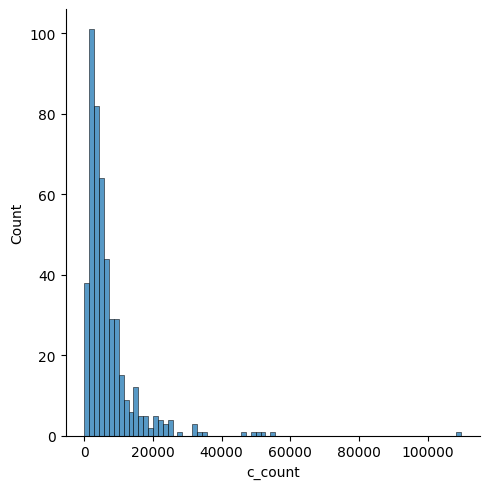

In [58]:
sns.displot(data = df_light,x='c_count')

### Bag of words

#### Preprocessor

In [59]:
import patat.util.text
preprocessor = patat.util.text.get_latin
#preprocessor=None

### Tokenizer

In [177]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
from patat.ml.lex_analyser import LexAnalyser

lex = LexAnalyser()

def toklematize(text):
    tokens = lex.get_lemmas_from_text(text)
    return tokens   

tokenizer = toklematize
#tokenizer = word_tokenize
#tokenizer = lex.get_words

### CountVectorizer

In [178]:
from sklearn.feature_extraction.text import CountVectorizer

In [179]:
%%time
vectorizer = CountVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer)
count_matrix = vectorizer.fit_transform(df_light['text'])
count_array = count_matrix.toarray()
df_count = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
df_count.shape

CPU times: user 336 ms, sys: 13.2 ms, total: 349 ms
Wall time: 348 ms


(469, 24344)

In [180]:
%%time
occ_rares = 3
df_count_sum = pd.DataFrame(df_count.sum())
df_count_sum[df_count_sum[0]<occ_rares].shape

CPU times: user 7.02 ms, sys: 703 µs, total: 7.72 ms
Wall time: 6.75 ms


(14590, 1)

In [181]:
keep_words = df_count_sum[df_count_sum[0]>occ_rares].index
len(keep_words)

7969

In [193]:
df_X = df_count[keep_words]

### TfIdfVectorizer

In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [184]:
%%time
vectorizer = TfidfVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer)
count_matrix = vectorizer.fit_transform(df_light['text'])
count_array = count_matrix.toarray()
df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
df_tf.shape

CPU times: user 340 ms, sys: 10.3 ms, total: 350 ms
Wall time: 350 ms


(469, 24344)

In [185]:
%%time
occ_rares = 0.1
df_tf_sum = pd.DataFrame(df_tf.sum())
df_tf_sum[df_tf_sum[0]>occ_rares].shape

CPU times: user 18.7 ms, sys: 1.24 ms, total: 20 ms
Wall time: 18.9 ms


(8006, 1)

In [186]:
keep_words = df_tf_sum[df_tf_sum[0]>occ_rares].index
len(keep_words)

8006

In [187]:
df_X = df_tf[keep_words]

In [188]:
len(df_X.keys())

8006

In [189]:
df_X

,aa,aaron,aatip,abandon,abandonner,abattage,abattre,abbé,abe,abjean,...,évoquer,évènement,événement,être,île,östlund,œil,œufs,œuvre,œuvres
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.062120,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0.0,0.0,0.020107,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.082068,0.0,0.0,0.0,0.0,0.016464,0.0
2,0.000000,0.0,0.0,0.0,0.009696,0.0,0.0,0.0,0.0,0.0,...,0.002689,0.0,0.000000,0.074443,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.078823,0.0,0.000000,0.036829,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.032942,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.080393,0.0,0.0,0.0,0.0,0.000000,0.0
465,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.057697,0.0,0.0,0.0,0.0,0.000000,0.0
466,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.039430,0.0,0.0,0.0,0.0,0.000000,0.0
467,0.047906,0.0,0.0,0.0,0.004133,0.0,0.0,0.0,0.0,0.0,...,0.003439,0.0,0.042063,0.119294,0.0,0.0,0.0,0.0,0.000000,0.0


### Logistic Regression

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [191]:
def train_test_logreg(X,y):
    results = {}
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.75)
    max_iter=500
    C=3000
    solver = 'lbfgs'
    classifier = LogisticRegression(C=C, random_state=42, solver=solver, multi_class='ovr', max_iter=500)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    print(f'Classifier :\t{classifier}')
    print(f'Accuracy :\t{metrics.accuracy_score(y_test, y_pred)*100:.2f}')
    print(f'Recall :\t{metrics.recall_score(y_test, y_pred)*100:.2f}')
    


In [194]:
train_test_logreg(df_X,df_light['infox'])

Classifier :	LogisticRegression(C=3000, max_iter=500, multi_class='ovr', random_state=42)
Accuracy :	72.03
Recall :	68.42


In [109]:
X=df_X
y=df_light['infox']

In [113]:
X.describe()

,aa,aaron,aatip,abandon,abandonner,abattage,abattre,abbé,abe,abjean,...,évoquer,évènement,événement,être,île,östlund,œil,œufs,œuvre,œuvres
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,...,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,0.000282,0.000377,0.000244,0.000864,0.001199,0.000249,0.000912,0.000284,0.001244,0.000231,...,0.002984,0.001069,0.004531,0.056685,0.000782,0.000390,0.000797,0.000521,0.003238,0.000759
std,0.004479,0.005561,0.005285,0.006271,0.005098,0.003273,0.006212,0.003745,0.024659,0.005010,...,0.011533,0.007540,0.014469,0.034246,0.006860,0.008440,0.004879,0.008801,0.012654,0.012599
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.032942,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.054025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.080459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.084445,0.098820,0.114449,0.100859,0.036943,0.060187,0.084843,0.068098,0.531599,0.108501,...,0.179694,0.116413,0.118323,0.199241,0.123267,0.182789,0.050677,0.185364,0.162713,0.266755


In [110]:
y.describe()

count    469.000000
mean       0.496802
std        0.500524
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: infox, dtype: float64

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.75)
classifier = LogisticRegression(C=100.0, random_state=42, solver='lbfgs', multi_class='ovr', max_iter=200)
classifier.fit(X,y)
y_pred = classifier.predict(X_test)
print(f'Classifier :\t{classifier}')
print(f'Accuracy :\t{metrics.accuracy_score(y_test, y_pred)*100:.2f}')
print(f'Recall :\t{metrics.recall_score(y_test, y_pred)*100:.2f}')


Classifier :	LogisticRegression(C=100.0, max_iter=200, multi_class='ovr', random_state=42)
Accuracy :	100.00
Recall :	100.00


## Mesure et observation des résultats
---

## Sauvegarde des résultats
---

## Conclusions
---

- Résultat : OK

## Bricolages
---

In [ ]:
!pip3 install --upgrade pip